# HW 5

Name: Christopher Morris

#### Question 1 
Discussion:

A simple predictor corrector scheme was used to model a damped one dimensional oscialation. First the period and frequency of the oscialation was found by finding the first zero from underneath the x-axis. Next, the factor b for the equation Ae^(-bt) was found by measuring the change in the amplitude at different locations in time. Then, the value for the constant of dampening (alpha) was increased until there were no oscilations. This was found by measuring the amount of zeros found over a certain time, and until that list of zeros was brought to 1 (so that the graph crossed zero once), alpha was constantly increased.



A) The period is: 6.29 s
A) The Frequency is 2pi/period: 1.00 s-1
A) This is the same as the natural frequency as the dampening only affects the amplitude but not the period.


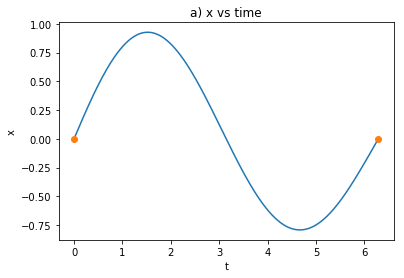

In [2]:
import sys, math
import matplotlib.pyplot as plt

# Global parameters.
a_list = [.1]
for alpha in a_list:
    a = alpha
    X0 = 0.0
    V0 = 1
    K  = 1.0
    DT = 0.001
    TMAX = 20.0

    amplitude = []
    time_amp = []
    time = []
    theta = []
    zeros_list = [X0]


    #-------------------------------------------------------------------------

    def acc(x, v, t, a):
        return -K*x - a*v

    def potential(x):
        return K*(1-math.cos(x)) 

    def energy(x, v):
        return potential(x) + 0.5*v*v

    #-------------------------------------------------------------------------
    
    def interp(x0, y0, x1, y1, x=None, y=None):
        if y == None:
            return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
        elif x == None:
            return (y-y0) * (x1 - x0) / (y1 - y0) + x0

    def time_to_stop(x, v, t):

        # Stopping condition.
        if len(zeros_list) == 2:
            return False
        else:
            return True

    def take_a_step(x, v, t, dt, alpha):

        # Take a single time step.

        a = acc(x, v, t, alpha)

        # Prediction:
        xp = x
        x += v*dt + 0.5*a*dt*dt
        v += a*dt
        t += dt

        # Correction:
        a1 = acc(x, v, t, alpha)
        v += 0.5*dt*(a1-a)

        af = acc(x, v, t, alpha)
        xf = x + v*dt + .5*af*dt*dt

        return x, xp, xf, v, t

    def check_amplitude(xp, x, xf, t):
        if (xp < x) and (xf <= x):
            amplitude.append(x)
            time_amp.append(t)
            
    def check_zero(xp, x, t):
        if (xp < 0) and (x >= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))

            
    # Declaration and initialization.

    t = 0
    x = X0
    v = V0
    dt = DT


    # Integrate the motion.

    while time_to_stop(x, v, t):
        (x,xp,xf,v,t) = take_a_step(x, v, t, dt, a)
        time.append(t)
        theta.append(x)
        check_zero(xp, x, t)
        
plt.plot(time, theta)
plt.plot(zeros_list, [0,0], 'o')
plt.title('a) x vs time')
plt.xlabel('t')
plt.ylabel('x')

print('A) The period is: {:.2f} s'.format(zeros_list[-1]))
print('A) The Frequency is 2pi/period: {:.2f} s-1'.format(2*math.pi/zeros_list[-1]))
print('A) This is the same as the natural frequency as the dampening only affects the amplitude but not the period.')



Equation used to find b

t0 is the time at one maximum, t is the time at the consectutive maximum.

amp0 is the ampltitude at one maximum, and amp is the amplitude at the consectuive maximum.

$$ b = -\frac{1}{(t - t_{0})} * ln(\frac{amp}{amp_{0}}) $$



1: b = 0.050000437443679324
2: b = 0.050000437903660405
3: b = 0.050000438363546465
4: b = 0.05000043882346941

average b = 0.050


Text(0,0.5,'x')

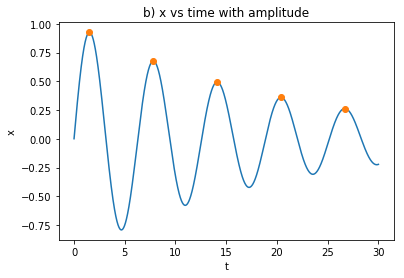

In [3]:

# Global parameters.
a_list = [.1]
for alpha in a_list:
    a = alpha
    X0 = 0.0
    V0 = 1
    K  = 1.0
    DT = 0.001
    TMAX = 20.0

    amplitude = []
    time_amp = []
    time = []
    theta = []
    zeros_list = [X0]


    def time_to_stop(x, v, t):

        # Stopping condition.
        if t > 30:
            return False
        else:
            return True
            
    # Declaration and initialization.

    t = 0
    x = X0
    v = V0
    #tmax = TMAX
    dt = DT

    
    # Integrate the motion.

    while time_to_stop(x, v, t):
        (x,xp,xf,v,t) = take_a_step(x, v, t, dt, a)
        time.append(t)
        theta.append(x)
        check_amplitude(xp, x, xf, t)
        
    b_list = []
    for i in range(len(amplitude)-1):
        b = -math.log(amplitude[i+1]/amplitude[i]) / (time_amp[i+1] - time_amp[i])
        b_list.append(b)
        print('{}: b = {}'.format(i+1, b))

    average_b = sum(b_list) / len(b_list)
    print('\naverage b = {:.3f}'.format(average_b))
        
plt.plot(time, theta)
plt.plot(time_amp, amplitude, 'o')
plt.title('b) x vs time with amplitude')
plt.xlabel('t')
plt.ylabel('x')



C) The final alpha is: 1.9
Anything past 1.91 will result in another zero as x crosses above the x axis.


Text(0,0.5,'x')

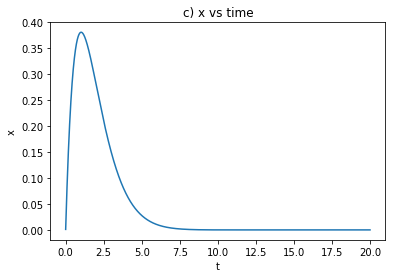

In [4]:

# Global parameters.
zeros_list = [0, 0]
a = 1   

while len(zeros_list) != 1:
    X0 = 0.0
    V0 = 1
    K  = 1.0
    DT = 0.001
    TMAX = 40

    amplitude = []
    time_amp = []
    time = []
    theta = []
    zeros_list = []



    def time_to_stop(x, v, t):

        # Stopping condition.
        if t > 20:
            return False
        else:
            return True

    def take_a_step(x, v, t, dt, alpha):

        # Take a single time step.

        a = acc(x, v, t, alpha)

        # Prediction:
        xp = x
        x += v*dt + 0.5*a*dt*dt
        v += a*dt
        t += dt

        # Correction:
        a1 = acc(x, v, t, alpha)
        v += 0.5*dt*(a1-a)

        af = acc(x, v, t, alpha)
        xf = x + v*dt + .5*af*dt*dt

        return x, xp, xf, v, t

            
    def check_zero(xp, x, t):
        if (xp < 0) and (x >= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))  
        if (xp > 0) and (x <= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))
            
    # Declaration and initialization.

    t = 0
    x = X0
    v = V0
    dt = DT

    # Integrate the motion.

    while time_to_stop(x, v, t):
        (x,xp,xf,v,t) = take_a_step(x, v, t, dt, a)
        time.append(t)
        theta.append(x)
        check_zero(xp, x, t)    
    
    a += .01

print('C) The final alpha is: {:.1f}'.format(a))
print('Anything past {:.2f} will result in another zero as x crosses above the x axis.'.format(a))
plt.figure()
plt.plot(time, theta)
plt.title('c) x vs time')
plt.xlabel('t')
plt.ylabel('x')


### Question 2

Discussion: Now the motion of a non-linear, driven and damped pendulumn was modeled, and the phase space 
(theat-velocity) graphs were made for each value of g (constant to drive), and a (constant to damp). The values of alpha, g were given as (0, 0), (.5, 0), (.5, 1), (.5, 1.07), (.5, 1.15), (.5, 1.5). The phase spaces were graphed on plots -3.5 <= x <= 3.5, -3 <= y <= 3. The values were not plotted until t>= 250 to allow for transients to go away, and the plots were graphed until t = 10000. 

The only graph that doesn't have the proper boundaries is alpha, g = .5, 0 because the graph when plotted on a normal axis showed only a point, however when more zoomed in the graph has meaningful data.

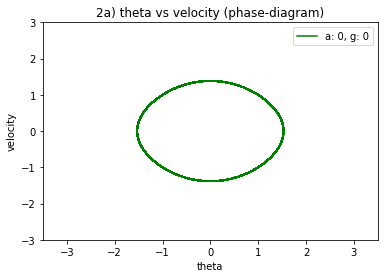

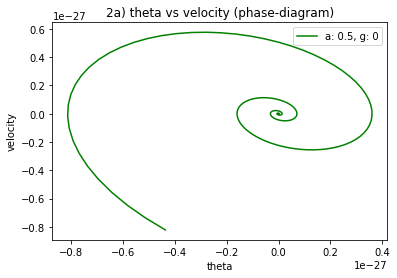

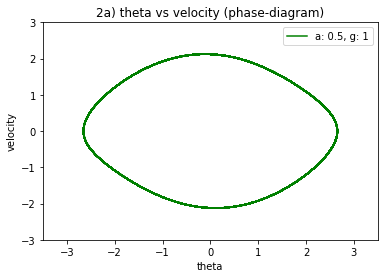

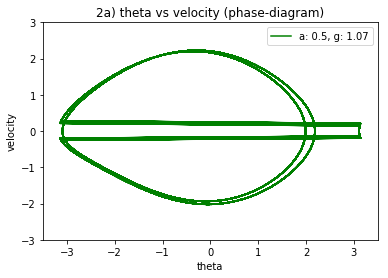

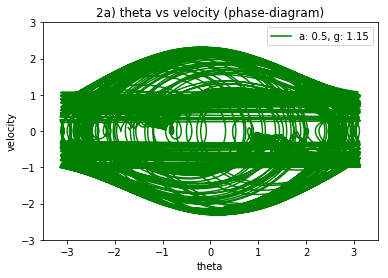

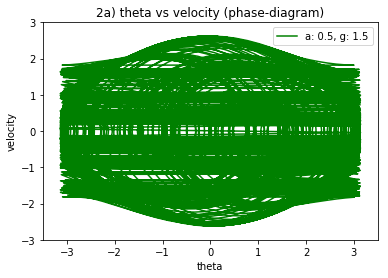

In [5]:

def time_to_stop(x, v, t, tmax):

    # Stopping condition.

    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, dt):

    # Take a single time step.

    a = acc(x, v, t)
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt

    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)
    
    return x, v, t

def acc(x, v, t):
    return -K*math.sin(x) - alpha*v + g*math.cos(wD * t)

def boundx(x):
    while (x >  math.pi): x -= 2*math.pi
    while (x < -math.pi): x += 2*math.pi
    return x


# Global parameters.
ag_list = [(0, 0), (.5, 0), (.5, 1), (.5, 1.07), (.5, 1.15), (.5, 1.5)]
for a, g in ag_list:
    alpha = a
    g = g
    wD = 2/3
    X0 = 1
    V0 = 1
    K  = 1.0
    DT = 0.1
    TMAX = 1500

    time = []
    theta = []
    v_list = []
    theta_bounded = []
   
    # Declaration and initialization.

    t = 0
    x = X0
    v = V0
    tmax = TMAX
    dt = DT

    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x,v,t) = take_a_step(x, v, t, dt)
        if t > 250:
            time.append(t)
            theta.append(x)
            theta_bounded.append(boundx(x))
            v_list.append(v)
    
    if not ((alpha == .5) and (g == 0)):
        plt.figure()
        plt.plot(theta_bounded, v_list, 'g-', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlim((-3.5, 3.5))
        plt.ylim((-3, 3))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('2a) theta vs velocity (phase-diagram)')
        plt.legend()
        
    else:
        plt.figure()
        plt.plot(theta_bounded, v_list, 'g-', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('2a) theta vs velocity (phase-diagram)')
        plt.legend()

### Extra Credit

Discussion: 
The same thing was done as above for 2, but instead the only points that were plotted were when the driving phase was an integral multiple of 2pi or in part b), when g = 1.15 when the driving phase was a multiple of 2pi + pi/4. This section was significantly more challenging to do because I don't know how the graphs might look. To determine if it's an integral multiple, the past and current driving phase (phi) was divided by 2pi (or 2pi + pi/4 for b) and the floor and ceiling functions were used to determine if ceiling(phi_past/2pi) == floor(phi/2pi), and if they were that means they seperate an integral multiple. Then the points that were found to straddle 2pi were then graphed.


Zooming in does not show a fractal pattern. 


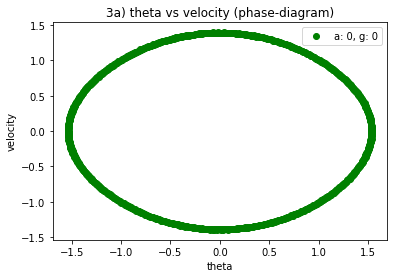

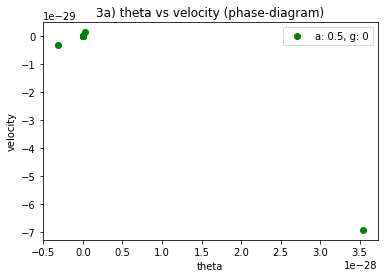

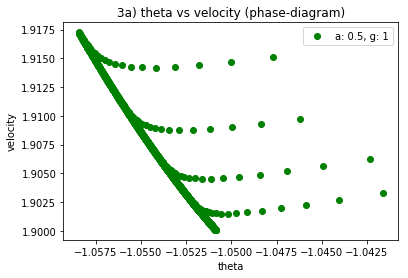

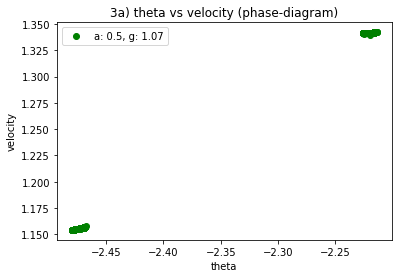

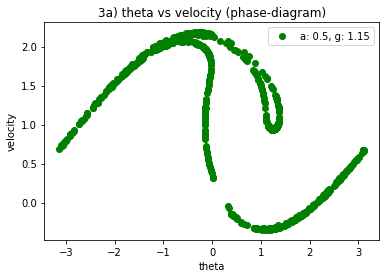

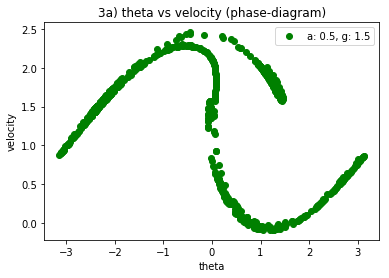

In [6]:
def time_to_stop(x, v, t, tmax):

    # Stopping condition.

    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, phi, wD, dt):
    mult = 2 * math.pi
    phip = phi
    phi = wD * t
    # Take a single time step.
    
    xp = x
    vp = v
    
    a = acc(x, v, t)
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt

    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)
    
    if (math.ceil(phip/mult) == math.floor(phi/mult)) or (math.ceil(phi/mult) == math.floor(phip/mult)):
        if math.ceil(phip/mult) == math.floor(phi/mult):
            t_phi = math.floor(phi/mult) * mult / wD
        else:
            t_phi = math.ceil(phi/mult) * mult / wD
        
        x_phi = interp(t-dt, xp, t, x, x = t_phi)
        v_phi = interp(t-dt, vp, t, v, x = t_phi)

    else:
        x_phi = None
        v_phi = None
    
    
    return x, v, x_phi, v_phi, phi, t


def acc(x, v, t):
    return -K*math.sin(x) - alpha*v + g*math.cos(wD * t)


# Global parameters.
ag_list = [(0, 0), (.5, 0), (.5, 1), (.5, 1.07), (.5, 1.15), (.5, 1.5)]
for a, g in ag_list:
    alpha = a
    g = g
    wD = 2/3
    X0 = 1
    V0 = 1
    K  = 1.0
    DT = 0.1
    TMAX = 10000

    time = []
    theta = []
    theta_unbounded = []
    velocity = []
    
    v_list = []
    theta_bounded = []
    
   
    #-------------------------------------------------------------------------

   

    # Declaration and initialization.

    t = 0
    x = X0
    xp = x
    v = V0
    vp = v
    phi = wD * t
    phip = phi
    
    tmax = TMAX
    dt = DT

    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x, v, x_phi, v_phi, phi, t) = take_a_step(x, v, t, phi, wD, dt)
        if t>250:
            theta.append(boundx(x))
            theta_unbounded.append(x)
            velocity.append(v)
            time.append(t)
            if x_phi != None:
                theta_bounded.append(boundx(x_phi))
                v_list.append(v_phi)


    if not ((alpha == .5) and (g == 0)):
        plt.figure()
        plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('3a) theta vs velocity (phase-diagram)')
        plt.legend()
    else:
        plt.figure()
        plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('3a) theta vs velocity (phase-diagram)')
        plt.legend()



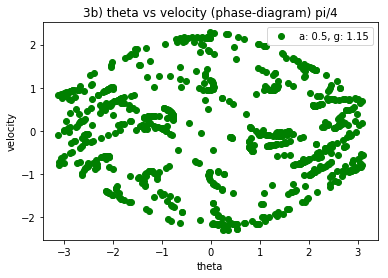

In [7]:
def time_to_stop(x, v, t, tmax):

    # Stopping condition.

    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, phi, wD, dt):
    mult = 2 * math.pi + math.pi/4
    phip = phi
    phi = wD * t
    # Take a single time step.
    
    xp = x
    vp = v
    
    a = acc(x, v, t)
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt

    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)
    
    if (math.ceil(phip/mult) == math.floor(phi/mult)) or (math.ceil(phi/mult) == math.floor(phip/mult)):
        if math.ceil(phip/mult) == math.floor(phi/mult):
            t_phi = math.floor(phi/mult) * mult / wD
        else:
            t_phi = math.ceil(phi/mult) * mult / wD
        
        x_phi = interp(t-dt, xp, t, x, x = t_phi)
        v_phi = interp(t-dt, vp, t, v, x = t_phi)

    else:
        x_phi = None
        v_phi = None
    
    
    return x, v, x_phi, v_phi, phi, t


def acc(x, v, t):
    return -K*math.sin(x) - alpha*v + g*math.cos(wD * t)


# Global parameters.
ag_list = [(.5, 1.15)]
for a, g in ag_list:
    alpha = a
    g = g
    wD = 2/3
    X0 = 1
    V0 = 1
    K  = 1.0
    DT = 0.1
    TMAX = 10000

    time = []
    theta = []
    theta_unbounded = []
    velocity = []
    
    v_list = []
    theta_bounded = []
    
   
    #-------------------------------------------------------------------------

   

    # Declaration and initialization.

    t = 0
    x = X0
    xp = x
    v = V0
    vp = v
    phi = wD * t
    phip = phi
    
    tmax = TMAX
    dt = DT
    
    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x, v, x_phi, v_phi, phi, t) = take_a_step(x, v, t, phi, wD, dt)
        if t>250:
            theta.append(boundx(x))
            theta_unbounded.append(x)
            velocity.append(v)
            time.append(t)
            if x_phi != None:
                theta_bounded.append(boundx(x_phi))
                v_list.append(v_phi)


    if not ((alpha == .5) and (g == 0)):
        plt.figure()
        plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('3b) theta vs velocity (phase-diagram) pi/4')
        plt.legend()
    else:
        plt.figure()
        plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('3b) theta vs velocity (phase-diagram) pi/4')
        plt.legend()



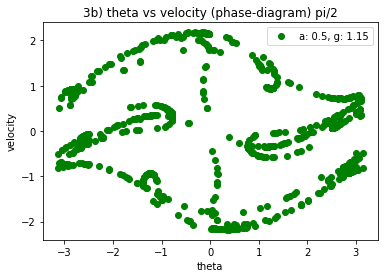

In [8]:
def time_to_stop(x, v, t, tmax):

    # Stopping condition.

    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, phi, wD, dt):
    mult = 2 * math.pi + math.pi/2
    phip = phi
    phi = wD * t
    # Take a single time step.
    
    xp = x
    vp = v
    
    a = acc(x, v, t)
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt

    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)
    
    if (math.ceil(phip/mult) == math.floor(phi/mult)) or (math.ceil(phi/mult) == math.floor(phip/mult)):
        if math.ceil(phip/mult) == math.floor(phi/mult):
            t_phi = math.floor(phi/mult) * mult / wD
        else:
            t_phi = math.ceil(phi/mult) * mult / wD
        
        x_phi = interp(t-dt, xp, t, x, x = t_phi)
        v_phi = interp(t-dt, vp, t, v, x = t_phi)

    else:
        x_phi = None
        v_phi = None
    
    
    return x, v, x_phi, v_phi, phi, t


def acc(x, v, t):
    return -K*math.sin(x) - alpha*v + g*math.cos(wD * t)


# Global parameters.
ag_list = [(.5, 1.15)]
for a, g in ag_list:
    alpha = a
    g = g
    wD = 2/3
    X0 = 1
    V0 = 1
    K  = 1.0
    DT = 0.1
    TMAX = 10000

    time = []
    theta = []
    theta_unbounded = []
    velocity = []
    
    v_list = []
    theta_bounded = []
    
   
    #-------------------------------------------------------------------------

   

    # Declaration and initialization.

    t = 0
    x = X0
    xp = x
    v = V0
    vp = v
    phi = wD * t
    phip = phi
    
    tmax = TMAX
    dt = DT
    
    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x, v, x_phi, v_phi, phi, t) = take_a_step(x, v, t, phi, wD, dt)
        if t>250:
            theta.append(boundx(x))
            theta_unbounded.append(x)
            velocity.append(v)
            time.append(t)
            if x_phi != None:
                theta_bounded.append(boundx(x_phi))
                v_list.append(v_phi)


    if not ((alpha == .5) and (g == 0)):
        plt.figure()
        plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('3b) theta vs velocity (phase-diagram) pi/2')
        plt.legend()
    else:
        plt.figure()
        plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
        plt.xlabel('theta')
        plt.ylabel('velocity')
        plt.title('3b) theta vs velocity (phase-diagram) pi/2')
        plt.legend()



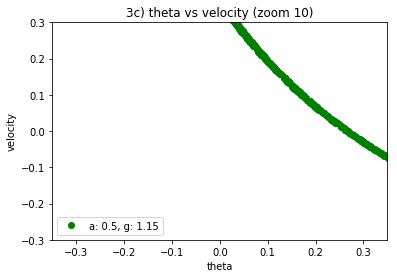

In [10]:
def time_to_stop(x, v, t, tmax):

    # Stopping condition.

    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, phi, wD, dt):
    mult = 2 * math.pi
    phip = phi
    phi = wD * t
    # Take a single time step.
    
    xp = x
    vp = v
    
    a = acc(x, v, t)
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt

    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)
    
    if (math.ceil(phip/mult) == math.floor(phi/mult)) or (math.ceil(phi/mult) == math.floor(phip/mult)):
        if math.ceil(phip/mult) == math.floor(phi/mult):
            t_phi = math.floor(phi/mult) * mult / wD
        else:
            t_phi = math.ceil(phi/mult) * mult / wD
        
        x_phi = interp(t-dt, xp, t, x, x = t_phi)
        v_phi = interp(t-dt, vp, t, v, x = t_phi)

    else:
        x_phi = None
        v_phi = None
    
    
    return x, v, x_phi, v_phi, phi, t


def acc(x, v, t):
    return -K*math.sin(x) - alpha*v + g*math.cos(wD * t)

# Global parameters.
ag_list = [(.5, 1.15)]
for a, g in ag_list:
    alpha = a
    g = g
    wD = 2/3
    X0 = 1
    V0 = 1
    K  = 1.0
    DT = 0.1
    TMAX = 1000000

    time = []
    theta = []
    v_list = []
    theta_bounded = []

    # Declaration and initialization.

    t = 0
    x = X0
    xp = x
    v = V0
    vp = v
    phi = wD * t
    phip = phi
    
    tmax = TMAX
    dt = DT

    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x, v, x_phi, v_phi, phi, t) = take_a_step(x, v, t, phi, wD, dt)
        if t>250:
            if x_phi != None:
                theta_bounded.append(boundx(x_phi))
                v_list.append(v_phi)

    
    plt.figure()
    plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
    plt.xlabel('theta')
    plt.ylabel('velocity')
    plt.title('3c) theta vs velocity (zoom 10)')
    plt.xlim((-3.5/10, 3.5/10))
    plt.ylim((-3/10, 3/10))
    plt.legend()

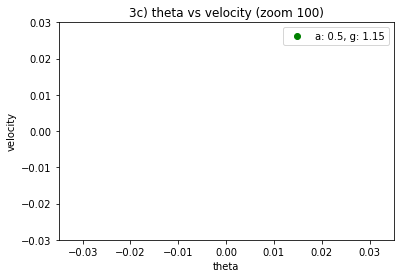

In [11]:
def time_to_stop(x, v, t, tmax):

    # Stopping condition.

    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, phi, wD, dt):
    mult = 2 * math.pi
    phip = phi
    phi = wD * t
    # Take a single time step.
    
    xp = x
    vp = v
    
    a = acc(x, v, t)
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt

    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)
    
    if (math.ceil(phip/mult) == math.floor(phi/mult)) or (math.ceil(phi/mult) == math.floor(phip/mult)):
        if math.ceil(phip/mult) == math.floor(phi/mult):
            t_phi = math.floor(phi/mult) * mult / wD
        else:
            t_phi = math.ceil(phi/mult) * mult / wD
        
        x_phi = interp(t-dt, xp, t, x, x = t_phi)
        v_phi = interp(t-dt, vp, t, v, x = t_phi)

    else:
        x_phi = None
        v_phi = None
    
    
    return x, v, x_phi, v_phi, phi, t


def acc(x, v, t):
    return -K*math.sin(x) - alpha*v + g*math.cos(wD * t)

# Global parameters.
ag_list = [(.5, 1.15)]
for a, g in ag_list:
    alpha = a
    g = g
    wD = 2/3
    X0 = 1
    V0 = 1
    K  = 1.0
    DT = 0.1
    TMAX = 1000000

    time = []
    theta = []
    v_list = []
    theta_bounded = []

    # Declaration and initialization.

    t = 0
    x = X0
    xp = x
    v = V0
    vp = v
    phi = wD * t
    phip = phi
    
    tmax = TMAX
    dt = DT

    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x, v, x_phi, v_phi, phi, t) = take_a_step(x, v, t, phi, wD, dt)
        if t>250:
            if x_phi != None:
                theta_bounded.append(boundx(x_phi))
                v_list.append(v_phi)

    
    plt.figure()
    plt.plot(theta_bounded, v_list, 'go', label = 'a: {}, g: {}'.format(alpha, g))
    plt.xlabel('theta')
    plt.ylabel('velocity')
    plt.title('3c) theta vs velocity (zoom 100)')
    plt.xlim((-3.5/100, 3.5/100))
    plt.ylim((-3/100, 3/100))
    plt.legend()